
# Spyctral's Tutorial


***This tutorial is a guide to use Spyctral package. Here we show, step by step, how to get started and the principal available options.***

### Install the library

In [2]:
!pip install spyctral-tools 

  Using cached spyctral_tools-0.0.1rc0-py3-none-any.whl.metadata (6.4 kB)
  Using cached numpy-2.2.3-cp313-cp313-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
  Using cached astropy-7.0.1-cp313-cp313-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (10 kB)
  Using cached pandas-2.2.3-cp313-cp313-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (89 kB)
  Using cached specutils-1.19.0-py3-none-any.whl.metadata (6.0 kB)
  Using cached matplotlib-3.10.0-cp313-cp313-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Using cached pyerfa-2.0.1.5-cp39-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.7 kB)
  Using cached astropy_iers_data-0.2025.2.24.0.34.4-py3-none-any.whl.metadata (5.1 kB)
  Using cached contourpy-1.3.1-cp313-cp313-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.56.0-cp313-cp313-manylinux_2_5_x86_64.manylinux

### Import packages

The first thing to do is import the necessary libraries. In general, you will need the following:

 * `spyctral`: the library that we present in this tutorial.
 * `numpy`: to manipulate arrays.
 * `matplotlib.pyplot`: to create and customize a wide range of static, animated, and interactive plots.
 * `os`: to interact with the operating system, such as handling file paths and managing directories.
 * `csv`: to read and write CSV files, which are commonly used for storing tabular data.
 
**Note**: In this tutorial, we assume that you already have experience using these libraries.

In [3]:
import spyctral as spy
import numpy as np
import os
import csv
import matplotlib.pyplot as plt

### Load the data

Next step is load the data. Spyctral needs a minimum of one text file and you need to know the source code of the file to be analysed to use the correct read function. 

The file path is the only mandatory setting in read functions and you must be sure to incluide the correct file/files path. You can also include extra configuration like asign the object name or the ammount of decimals to get the parameters values. Explore all the different options for each read function with help task to adapt it to your needs. 


### Single loading

For this tutorial step we will use a data file available in test folder for your try as well. 

In [4]:
star_object_1 = spy.read_fisa('../../tests/datasets/case_SC_FISA.fisa')

In [5]:
star_object_2 = spy.read_starlight('../../tests/datasets/case_SC_Starlight.out', object_name='object_2')

Those lines created two `SpectralSummary` objects that store all the information from FISA and STARLIGHT files. Here we show the objects and how they save the data.

In [6]:
star_object_1

<SpectralSummary(
  header={fisa_version, date_time, reddening, adopted_template, normalization_point, spectra_names},
  data={Unreddened_spectrum, Template_spectrum, Observed_spectrum, Residual_flux},
  age, reddening, av_value, normalization_point, z_value,
  spectra={Unreddened_spectrum, Template_spectrum, Observed_spectrum, Residual_flux},
  extra_info={str_template, name_template, age_map, error_age_map, z_map})>

In [7]:
star_object_2

<SpectralSummary(
  header={Date, Cid@UFSC, arq_obs, arq_base, arq_masks, arq_config, N_base, N_YAV_components, i_FitPowerLaw, alpha_PowerLaw, red_law_option, q_norm, l_ini, l_fin, dl, l_norm, llow_norm, lupp_norm, fobs_norm, llow_SN, lupp_SN, S_N_in_S_N_window, S_N_in_norm_window, S_N_err_in_S_N_window, S_N_err_in_norm_window, fscale_chi2, idum_orig, NOl_eff, Nl_eff, Ntot_cliped, clip_method, Nglobal_steps, N_chains, NEX0s_base, Clip_Bug, RC_Crash, Burn_In, n_censored_weights, wei_nsig_threshold, wei_limit, idt_all, wdt_TotTime, wdt_UsrTime, wdt_SysTime, chi2_Nl_eff, adev, sum_of_x, Flux_tot, Mini_tot, Mcor_tot, v0_min, vd_min, AV_min, YAV_min, Nl_obs},
  data={synthetic_spectrum, synthetic_results, results_average_chains_xj, results_average_chains_mj, results_average_chains_Av_chi2_mass},
  age, reddening, av_value, normalization_point, z_value,
  spectra={synthetic_spectrum, observed_spectrum, residual_spectrum},
  extra_info={xj_percent, age_decimals, rv, z_decimals, ssps_vector, s

### Set loading

If you have a set of files, you can load all the files at once. To make that you can define the files list and their folder path. For example we select a set of 15 STARLIGHT files, and we save the objects from each file in a dictionary `ss_objects`. 

In [10]:
folder_files_path ='../../tests/datasets/set_STARLIGHT_files'

In [12]:
files_list  = [f for f in os.listdir(folder_files_path) if os.path.isfile(os.path.join(folder_files_path, f)) and f.endswith('.out')]

In [13]:
ss_objects = {}
for idx, file in enumerate(files_list):
    var_name = f"ss_obj_{idx}"  
    ss_objects[var_name] = spy.read_starlight(f'{folder_files_path}/{file}', object_name=file)    

In [14]:
len(ss_objects)

30

In [15]:
ss_objects['ss_obj_1']

<SpectralSummary(
  header={Date, Cid@UFSC, arq_obs, arq_base, arq_masks, arq_config, N_base, N_YAV_components, i_FitPowerLaw, alpha_PowerLaw, red_law_option, q_norm, l_ini, l_fin, dl, l_norm, llow_norm, lupp_norm, fobs_norm, llow_SN, lupp_SN, S_N_in_S_N_window, S_N_in_norm_window, S_N_err_in_S_N_window, S_N_err_in_norm_window, fscale_chi2, idum_orig, NOl_eff, Nl_eff, Ntot_cliped, clip_method, Nglobal_steps, N_chains, NEX0s_base, Clip_Bug, RC_Crash, Burn_In, n_censored_weights, wei_nsig_threshold, wei_limit, idt_all, wdt_TotTime, wdt_UsrTime, wdt_SysTime, chi2_Nl_eff, adev, sum_of_x, Flux_tot, Mini_tot, Mcor_tot, v0_min, vd_min, AV_min, YAV_min, Nl_obs},
  data={synthetic_spectrum, synthetic_results, results_average_chains_xj, results_average_chains_mj, results_average_chains_Av_chi2_mass},
  age, reddening, av_value, normalization_point, z_value,
  spectra={synthetic_spectrum, observed_spectrum, residual_spectrum},
  extra_info={xj_percent, age_decimals, rv, z_decimals, ssps_vector, s

In [16]:
ss_objects['ss_obj_14']

<SpectralSummary(
  header={Date, Cid@UFSC, arq_obs, arq_base, arq_masks, arq_config, N_base, N_YAV_components, i_FitPowerLaw, alpha_PowerLaw, red_law_option, q_norm, l_ini, l_fin, dl, l_norm, llow_norm, lupp_norm, fobs_norm, llow_SN, lupp_SN, S_N_in_S_N_window, S_N_in_norm_window, S_N_err_in_S_N_window, S_N_err_in_norm_window, fscale_chi2, idum_orig, NOl_eff, Nl_eff, Ntot_cliped, clip_method, Nglobal_steps, N_chains, NEX0s_base, Clip_Bug, RC_Crash, Burn_In, n_censored_weights, wei_nsig_threshold, wei_limit, idt_all, wdt_TotTime, wdt_UsrTime, wdt_SysTime, chi2_Nl_eff, adev, sum_of_x, Flux_tot, Mini_tot, Mcor_tot, v0_min, vd_min, AV_min, YAV_min, Nl_obs},
  data={synthetic_spectrum, synthetic_results, results_average_chains_xj, results_average_chains_mj, results_average_chains_Av_chi2_mass},
  age, reddening, av_value, normalization_point, z_value,
  spectra={synthetic_spectrum, observed_spectrum, residual_spectrum},
  extra_info={xj_percent, age_decimals, rv, z_decimals, ssps_vector, s

**Note:** The next steps are available for all `SpectralSummary`, we make the showing with the second one for simplicity.

### Getting data information

The created object contains several atributes and methods. You can obtain the object name, header information, spectra tables, age, reddening and other parameters. Here we show how to get some of them: 

In [17]:
star_object_2.header

<header {'i_FitPowerLaw', 'arq_config', 'fobs_norm', 'red_law_option', 'AV_min', 'N_YAV_components', 'Nl_eff', 'idt_all', 'Cid@UFSC', 'clip_method', 'Flux_tot', 'arq_base', 'llow_norm', 'vd_min', 'Nglobal_steps', 'dl', 'Ntot_cliped', 'n_censored_weights', 'NOl_eff', 'lupp_norm', 'wdt_SysTime', 'wei_limit', 'Clip_Bug', 'l_norm', 'idum_orig', 'llow_SN', 'N_chains', 'Nl_obs', 'S_N_err_in_norm_window', 'alpha_PowerLaw', 'Date', 'q_norm', 'S_N_err_in_S_N_window', 'chi2_Nl_eff', 'N_base', 'sum_of_x', 'Burn_In', 'fscale_chi2', 'v0_min', 'adev', 'Mini_tot', 'lupp_SN', 'arq_obs', 'YAV_min', 'S_N_in_norm_window', 'arq_masks', 'l_fin', 'wei_nsig_threshold', 'S_N_in_S_N_window', 'wdt_TotTime', 'NEX0s_base', 'RC_Crash', 'l_ini', 'Mcor_tot', 'wdt_UsrTime'}>

In [18]:
star_object_2.data

<data {'results_average_chains_xj', 'results_average_chains_mj', 'results_average_chains_Av_chi2_mass', 'synthetic_results', 'synthetic_spectrum'}>

In [19]:
star_object_2.extra_info

<extra {'synthesis_info', 'age_decimals', 'z_decimals', 'ssps_vector', 'average_log_age', 'rv', 'xj_percent'}>

In [20]:
ssps_vector = star_object_2.extra_info.ssps_vector
ssps_vector

,j,x_j,Mini_j,Mcor_j,age_j,Z_j,_j,YAV,Mstars,component_j,a/Fe,SSP_chi2r,SSP_adev,SSP_AV,SSP_x
0,5.0,13.323198,0.081313,0.1334,8.710000e+06,0.004,0.017050,0.0,0.8983,0.8983,0.0,4.6516,4.4419,2.4721,92.8005
1,16.0,33.277591,12.942000,13.7960,1.278050e+09,0.004,0.000267,0.0,0.5837,0.5837,0.0,2.0388,2.8490,0.4472,100.5466
2,39.0,53.399210,24.894000,26.8560,1.278050e+09,0.008,0.000223,0.0,0.5907,0.5907,0.0,2.8045,3.2546,0.3218,101.3126


In [21]:
ssps_ages = star_object_2.extra_info.ssps_vector.age_j
ssps_ages

0    8.710000e+06
1    1.278050e+09
2    1.278050e+09
Name: age_j, dtype: float64

In [22]:
star_object_2.age

1108933312.92

In [23]:
star_object_2.z_value

0.006

In [24]:
star_object_2.reddening

0.2533548387096774

These methods are:

- `header_info_df`
- `get_spectrum()`
- `feh_ratio`
- `get_all_properties`
- `plot`


In [25]:
df_header_info = star_object_2.header_info_df
df_header_info

,value
Date,2007-04-01 00:00:00
Cid@UFSC,OUTPUT of StarlightChains_v04.for
arq_obs,SL573_1922_n4020.dat
arq_base,Base.BC03.Sbmm
arq_masks,Mask.txt
arq_config,StCv04.C11.config
N_base,69.0
N_YAV_components,0.0
i_FitPowerLaw,0.0
alpha_PowerLaw,-9.99


In [26]:
star_object_2.spectra.observed_spectrum

<Spectrum1D(flux=[0.77398 ... 1.17066]  (shape=(1524,), mean=1.11161); spectral_axis=<SpectralAxis [3808. 3810. 3812. ... 6850. 6852. 6854.] Angstrom> (length=1524))>

In [27]:
star_object_2.feh_ratio

np.float64(-0.5006023505691852)

The `get_all_properties` method creates a DataFrame containing all relevant parameters of the instance. Numerical values are formatted to display in scientific notation where necessary. 

In [28]:
star_object_2.get_all_properties

,Property,Value
0,object_name,object_2
1,age,1.11e+09
2,err_age,4.31e+08
3,reddening,0.253355
4,av_value,0.7854
5,z_value,0.006
6,feh_ratio,-0.500602
7,normalization_point,4020.0


### Using the values

It's possible to work with each value and make separed calculations:

In [29]:
object_age = star_object_2.age

In [30]:
log_object_age = np.log10(object_age)
print(log_object_age)

9.04490543009716


In [31]:
average_age = np.average(ssps_ages)
print(np.log10(average_age))

8.931933943575011


In [32]:
median_age = np.median(ssps_ages)
print(median_age)
print(np.log10(median_age))

1278050000.0
9.106547844666926


### Saving data

Using `cvs` library you can save the information in the objects. Here is how to do it for header information:

In [28]:
output_file = 'output_file_name.txt'

df_fixed = df_header_info.reset_index()
df_fixed.columns = ['Parameter', 'Value'] 

with open(output_file, 'w', newline='') as f:
    writer = csv.writer(f, delimiter='\t')  
    writer.writerow(df_fixed.columns)  
    writer.writerows(df_fixed.values)  
    
print(f"File saved as: {output_file}")

File saved as: output_file_name.txt


In [29]:
output_file = 'ssps_vector.txt'

df_fixed = ssps_vector.reset_index()

with open(output_file, 'w', newline='') as f:
    writer = csv.writer(f, delimiter='\t')  
    writer.writerow(df_fixed.columns)  
    writer.writerows(df_fixed.values)  
    
print(f"File saved as: {output_file}")

File saved as: ssps_vector.txt


### Plotting spectra

The `plot` method returns a `SpectralPlotter` object to generate plots from spectral data provided by a SpectralSummary object.
Spectra plotting can be done in several ways:

- All spectra
- Plot a single spectrum
- All spectra with an offset spacing
- Subplot indivual spectrum

**Note:** By default the `plot` method use the `.all_spectra()`

#### Plotting all spectra

<Axes: title={'center': 'All spectra - object_2'}, xlabel='Wavelength ($\\AA$)', ylabel='Flux'>

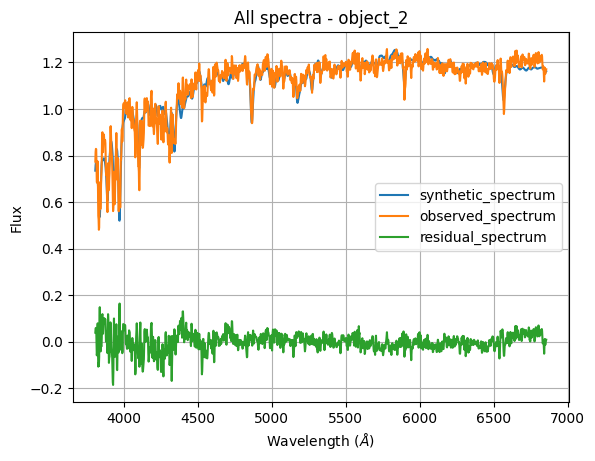

In [33]:
star_object_2.plot()

#### Single spectrum plot

<Axes: title={'center': 'observed_spectrum - object_2'}, xlabel='Wavelength ($\\AA$)', ylabel='Flux'>

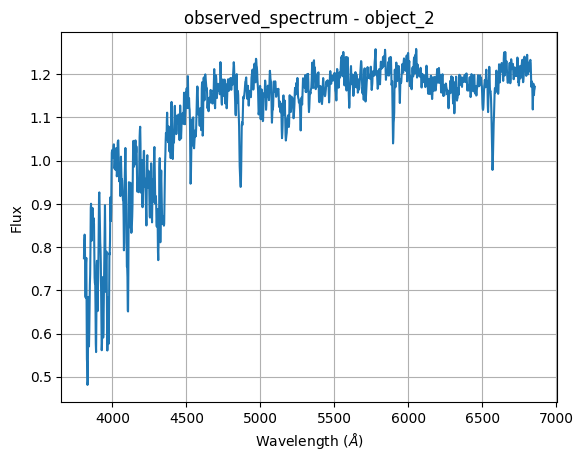

In [34]:
star_object_2.plot.single('observed_spectrum')

#### Splited spectra

<Axes: title={'center': 'Spectra with offset - object_2'}, xlabel='Wavelength ($\\AA$)', ylabel='Flux'>

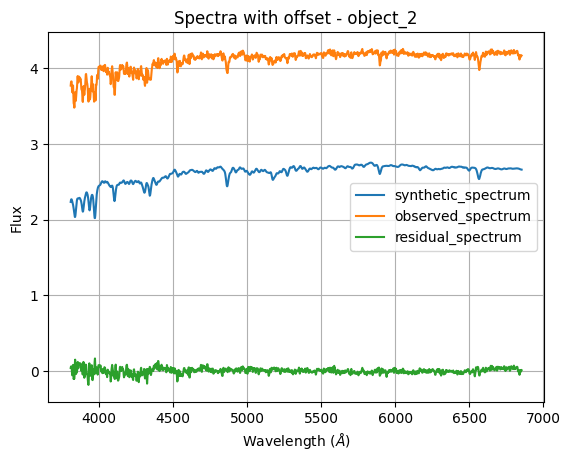

In [35]:
star_object_2.plot.split(1.5)

#### Subplotting all spectra

array([<Axes: title={'center': 'object_2'}, ylabel='Flux'>,
       <Axes: ylabel='Flux'>,
       <Axes: xlabel='Wavelength ($\\AA$)', ylabel='Flux'>], dtype=object)

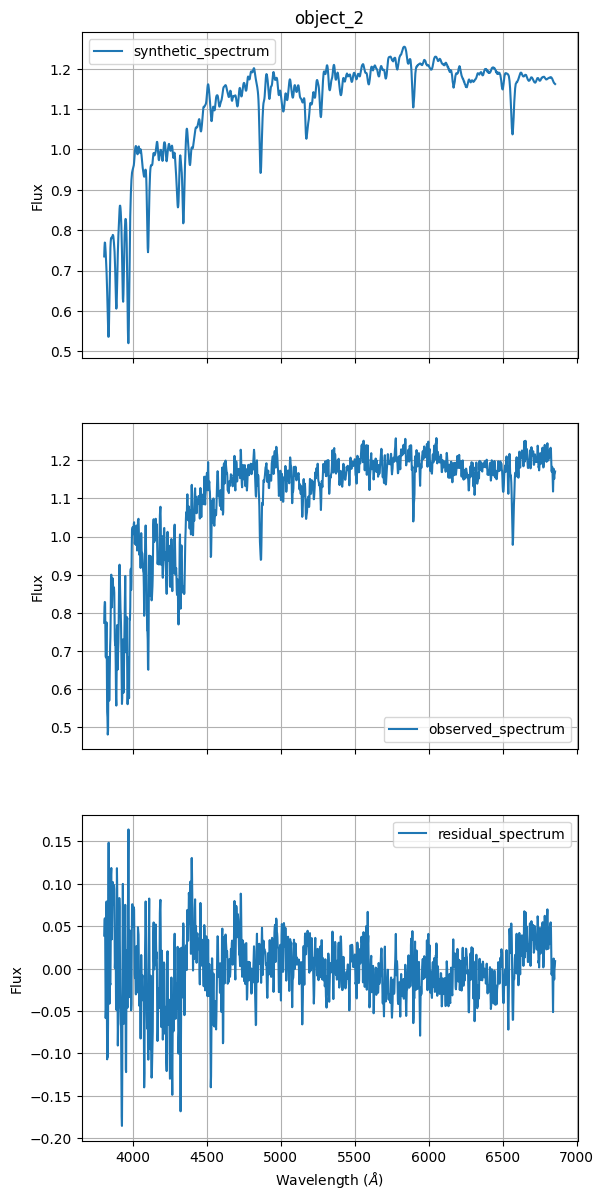

In [36]:
star_object_2.plot.subplots()

#### Comparing plots

In astronomical analysis is important to compare the spectrum and is very simple to make it using the tools from `Spectuils` and `Matplotlib`libraries. 
First you could save the spectrum in new variables:

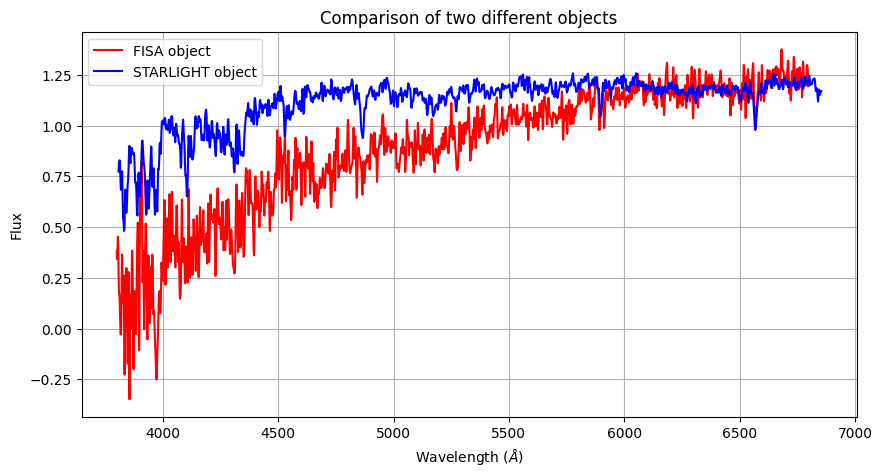

In [37]:
plt.figure(figsize=(10, 5)) 
star_object_1.plot.single('Observed_spectrum', label="FISA object", color='red')
star_object_2.plot.single('observed_spectrum', label="STARLIGHT object", color='blue')

plt.title("Comparison of two different objects")
plt.legend()
plt.show()

#### Setting your preference in plots

You can set your personal configuration plot. Plots are based on the `Matplotlib` library; hence, its characteristics may be used.

<Axes: title={'center': 'observed_spectrum - object_2'}, xlabel='Wavelength ($\\AA$)', ylabel='Flux'>

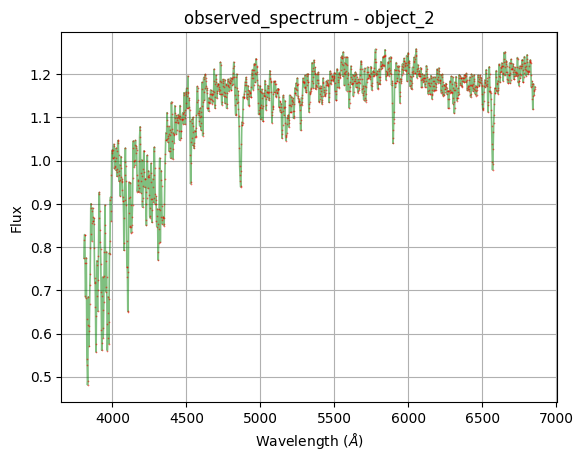

In [38]:
star_object_2.plot.single(
    'observed_spectrum', 
    color = 'green', 
    linestyle = '-', 
    linewidth = 1.2, 
    marker = '*', 
    markersize = 0.7, 
    markeredgecolor = 'red', 
    alpha = 0.5
)

***NOTE:*** All the files used in this tutorial are vailable for you in `test` directory. 